In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive"
!ls

/content/drive/MyDrive
'Act 4.2.gdoc'
'Actividad 1.2.gdoc'
'Actividad 4.1'
'Actividad: El sentido de mi Marca Personal.gdoc'
'Actividad en clase M3C5.gdoc'
 AI
 appsheet
'Assessment 2, Part 2: Marketing Plan - Marketing Mix.gdoc'
 AUS
'Chapter 14: Global Marketing.gslides'
'Colab Notebooks'
'Copia de Inspección de Material.gsheet'
'Crypto Capital Trading Journal'
 Desarrollo
'Diagrama sin título.drawio'
'Diagramas Software 4o'
'Experimento 1 (File responses)'
'Experimento - DB usuarios.gsheet'
 Genesis
'ITC Varios'
 JOBO
'Plan de Trabajo - Equipo Tokens.gsheet'
 Plantillas
'Prepa Varios'
'Presentación Economía.gdoc'
'Presentaciones Lalo'
'Presentación - Propuesta de Proyecto IMIMEX.pdf'
'Presentación SemanaTec Git'
'Prueba - Registro de Documentos.gdoc'
'Semana Tec Servicio Social'
'Sitemap JOBO - Usuario (A Futuro).drawio'
 TC1004B2020
 test_data
 train_data


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = 'AI/LEGO_v1'
train_dir = os.path.join(base_dir,'train')
#train_dir = 'train_data'
test_dir = os.path.join(base_dir, 'test')
#test_dir = 'test_data'

train_datagen = ImageDataGenerator(
		 					# hay que tomar en cuenta la semántica y naturaleza del problema a solucionar, para elegir los parámetros que se pueden modificar (y los que no)

		 					# Optimación numérica
							rescale = 1./255,
							 # "Una mano sigue siendo una mano sin importar su ángulo de rotación (pero hay cosas que sí)"
							#rotation_range = 100,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
						  # Alargar la imagen
							shear_range = 0.3,
							zoom_range = 0.3)
							#horizontal_flip = True

para ello tenemos que asignar una fuente base de imágenes a modificar, en este caso tomamos las de el directorio de train, en este caso solo estamos tomando una imagen y estamos mostrando como se generarían 5 imágenes diferentes:

Found 5109 images belonging to 16 classes.


<Figure size 640x480 with 0 Axes>

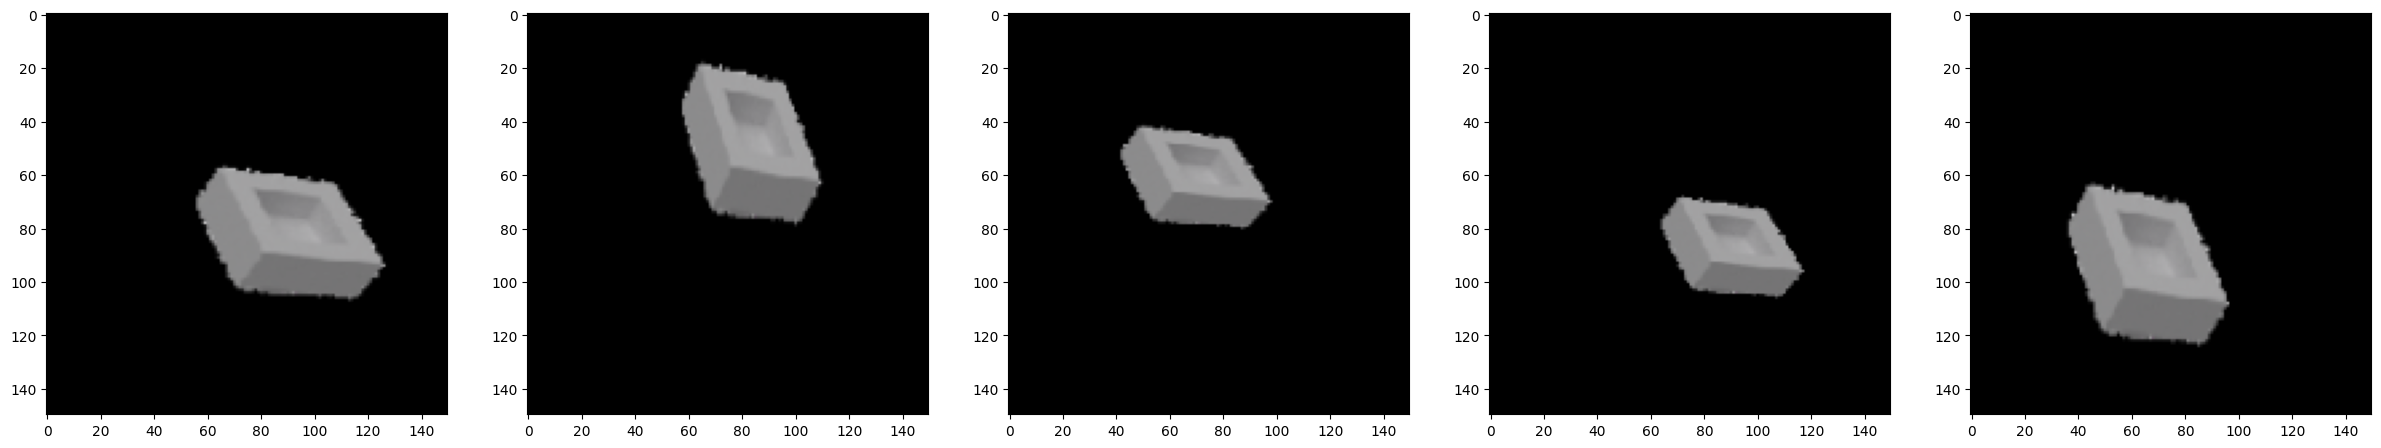

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							# estandariza el tamaño de las imágenes que se van generando
							target_size = (150, 150),
							# cantidad de fotos
							batch_size = 1,
							class_mode ='categorical',
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
	axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estamos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 5109 images belonging to 16 classes.
(8, 150, 150, 3)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


<Figure size 640x480 with 0 Axes>

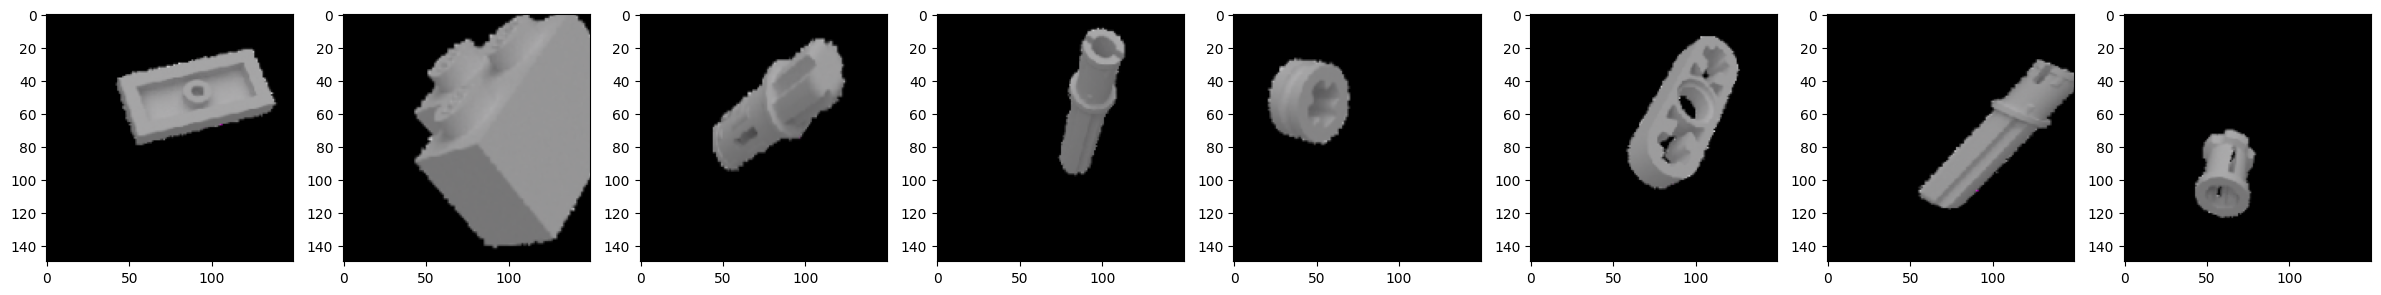

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])


También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo.

In [ ]:
path = "/content/drive/MyDrive/Cursos/TC3002 Aplicaciones Avanzadas de Computacion/Machine Learning/Data Augmentation/"

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 8 images belonging to 2 classes.


Esta es una red neuronal convolutiva:

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_2 (Flatten)         (None, 219040)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               56074496  
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 56075033 (213.91 MB)
Trainable params: 56075033 (213.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6946 - acc: 0.3750
Epoch 2/10
1/1 [==============================] - 1s 979ms/step - loss: 0.6798 - acc: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 994ms/step - loss: 2.1859 - acc: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 996ms/step - loss: 0.8103 - acc: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.7557 - acc: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.7486 - acc: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 983ms/step - loss: 0.6984 - acc: 0.5000
Epoch 8/10
1/1 [==============================] - 1s 985ms/step - loss: 0.6936 - acc: 0.5000
Epoch 9/10
1/1 [==============================] - 1s 984ms/step - loss: 0.7292 - acc: 0.5000
Epoch 10/10
1/1 [==============================] - 1s 983ms/step - loss: 0.6053 - acc: 0.5000


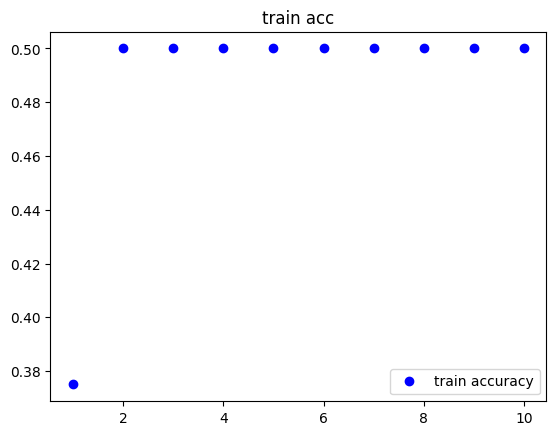

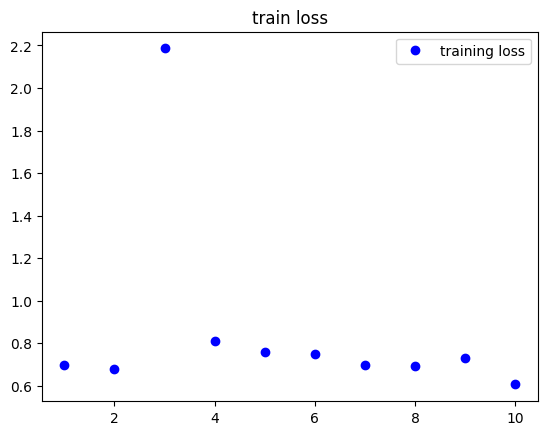

In [ ]:
history = model.fit(
						train_generator,
						epochs = 10)


acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 34 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


 2/25 [=>............................] - ETA: 1:30 - loss: 108.0931 - acc: 0.5882

25/25 [==============================] - 4s 164ms/step - loss: 108.0931 - acc: 0.5882

test acc :
 0.5882353186607361
